<h1> Training</h1>
If you have annotations from the previous version of FRCNN, go to the 'convertFromCSV' notebook and follow the provided instructions. After doing so, return to this notebook.
<br> <br>
Before training, split your data into some training images and some validation images. To do this, add each training image as well as its corresponding annotation .xml file into the images/train folder in the FRCNN2 folder. Similarly, add each validation image as well as its corresponding annotation .xml file into the images/test folder. A 90% training image, 10% validation image split is recommended
<br> <br>
Run the cell below to define all imports and helper functions for this notebook

In [13]:
%run ./imports.ipynb
%run ./filepaths.ipynb
%run ./functions.ipynb
%run ./training.ipynb
%run ./inferencing.ipynb

Populate CLASSES with the classes you would like to find. As indictated, reserve the first entry for the background. 

In [14]:
# classes: first entry is reserved for background, DEFINE CLASSES HERE
CLASSES = [
    'background', 'worm'
]
NUM_CLASSES = len(CLASSES)

Training parameters are defined below

In [15]:
BATCH_SIZE = 4 # increase / decrease according to GPU memory
RESIZE_TO = 1024 # resize the image for training and transforms
NUM_EPOCHS = 20 # number of epochs to train for
SAVE_PLOTS_EPOCH = 2 # save loss plots after these many epochs
SAVE_MODEL_EPOCH = 2 # save model after these many epochs

Run the cell below to load in your images and annotations. This cell will print the number of images found in the testing and training folder

In [16]:
# prepare the final datasets and data loaders
train_dataset = getDataset(TRAIN_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_train_transform())
valid_dataset = getDataset(VALID_DIR, RESIZE_TO, RESIZE_TO, CLASSES, get_valid_transform())
[train_loader, valid_loader] = get_loaders(train_dataset, valid_dataset, BATCH_SIZE, collate_fn)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}\n")

Number of training samples: 22
Number of validation samples: 2



Run the cell below to visualize your data to ensure that bounding boxes match images as expected. There will be gridlines in the image shown

0


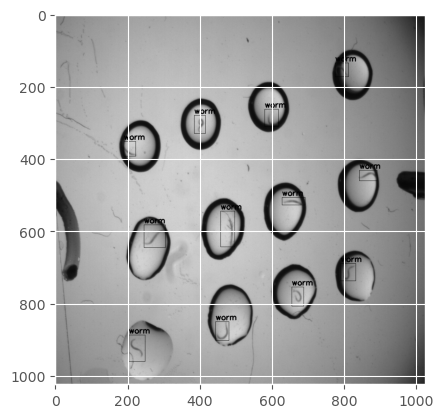

In [17]:
NUM_SAMPLES_TO_VISUALIZE = 1
visualize_samples(NUM_SAMPLES_TO_VISUALIZE, TRAIN_DIR, RESIZE_TO, CLASSES)

Train your model by running the cell below! After the specified number of epochs passes, the model will be saved and a plot of the training/validation loss over time will be shown 


EPOCH 1 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

0
19
2
7
20
18
11
13
12
3
9
5
1
14
8
15
21
16
10
4
6
17
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #0 train loss: 1.792
Epoch #0 validation loss: 1.390
Took 0.039 minutes for epoch 0

EPOCH 2 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

19
21
6
10
18
13
16
20
3
7
17
2
0
1
9
11
14
5
8
12
15
4
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #1 train loss: 1.415
Epoch #1 validation loss: 1.188
Took 0.033 minutes for epoch 1
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 3 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

6
21
13
8
3
2
11
15
18
19
5
0
20
9
17
4
1
12
7
14
16
10
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #2 train loss: 1.206
Epoch #2 validation loss: 1.068
Took 0.033 minutes for epoch 2

EPOCH 4 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

4
9
15
2
11
5
10
21
12
0
3
1
18
19
20
8
14
16
6
17
13
7
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #3 train loss: 1.154
Epoch #3 validation loss: 1.160
Took 0.034 minutes for epoch 3
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 5 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

4
5
8
15
2
20
19
9
17
12
11
0
18
13
1
6
3
16
10
21
7
14
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #4 train loss: 1.139
Epoch #4 validation loss: 1.213
Took 0.033 minutes for epoch 4

EPOCH 6 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

17
2
20
7
11
9
18
3
21
13
1
19
5
14
0
8
12
4
15
6
10
16
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #5 train loss: 1.074
Epoch #5 validation loss: 1.101
Took 0.033 minutes for epoch 5
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 7 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

1
12
11
16
15
6
19
4
14
21
10
20
2
17
13
9
7
5
0
8
18
3
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #6 train loss: 1.006
Epoch #6 validation loss: 1.056
Took 0.034 minutes for epoch 6

EPOCH 8 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

18
4
5
13
2
11
3
10
20
8
6
1
14
16
17
7
0
21
19
15
12
9
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #7 train loss: 0.907
Epoch #7 validation loss: 0.980
Took 0.034 minutes for epoch 7
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 9 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

11
13
1
8
6
15
7
3
17
20
16
5
14
10
0
21
12
18
19
4
2
9
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #8 train loss: 0.846
Epoch #8 validation loss: 0.935
Took 0.034 minutes for epoch 8

EPOCH 10 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

11
9
3
21
6
20
1
7
4
10
12
5
0
18
16
19
15
13
17
2
14
8
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #9 train loss: 0.800
Epoch #9 validation loss: 0.931
Took 0.034 minutes for epoch 9
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 11 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

15
6
19
16
11
4
2
8
0
9
20
5
14
3
10
13
12
17
21
18
1
7
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #10 train loss: 0.765
Epoch #10 validation loss: 0.880
Took 0.034 minutes for epoch 10

EPOCH 12 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

3
14
15
2
17
12
13
11
21
16
7
6
8
9
5
4
20
1
10
18
0
19
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #11 train loss: 0.759
Epoch #11 validation loss: 0.857
Took 0.034 minutes for epoch 11
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 13 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

11
8
1
18
16
13
14
10
6
20
7
19
4
12
2
5
3
0
21
15
17
9
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #12 train loss: 0.722
Epoch #12 validation loss: 0.810
Took 0.034 minutes for epoch 12

EPOCH 14 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

6
21
20
2
11
8
1
17
16
18
14
9
3
0
5
19
12
15
13
10
7
4
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #13 train loss: 0.669
Epoch #13 validation loss: 0.790
Took 0.034 minutes for epoch 13
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 15 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

18
9
10
19
1
13
20
11
4
8
6
15
14
0
21
12
17
5
2
3
16
7
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #14 train loss: 0.650
Epoch #14 validation loss: 0.676
Took 0.034 minutes for epoch 14

EPOCH 16 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

8
2
1
15
10
21
7
19
16
0
20
4
17
12
5
13
18
9
11
14
3
6
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #15 train loss: 0.678
Epoch #15 validation loss: 0.811
Took 0.034 minutes for epoch 15
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 17 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

8
17
7
13
10
21
15
14
2
0
4
5
11
6
19
20
12
3
16
1
18
9
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #16 train loss: 0.632
Epoch #16 validation loss: 0.731
Took 0.034 minutes for epoch 16

EPOCH 18 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

20
11
19
17
12
0
21
16
13
2
10
8
4
15
18
14
9
6
7
5
3
1
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #17 train loss: 0.636
Epoch #17 validation loss: 0.793
Took 0.034 minutes for epoch 17
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...

EPOCH 19 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

9
12
6
10
11
13
18
8
15
4
14
1
20
19
2
3
5
21
0
17
16
7
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #18 train loss: 0.608
Epoch #18 validation loss: 0.732
Took 0.033 minutes for epoch 18

EPOCH 20 of 20
Training


  0%|          | 0/6 [00:00<?, ?it/s]

9
18
6
13
16
12
1
2
3
0
14
5
20
8
21
17
15
11
19
7
4
10
Validating


  0%|          | 0/1 [00:00<?, ?it/s]

0
1
Epoch #19 train loss: 0.593
Epoch #19 validation loss: 0.766
Took 0.033 minutes for epoch 19
SAVING MODEL COMPLETE...

SAVING PLOTS COMPLETE...


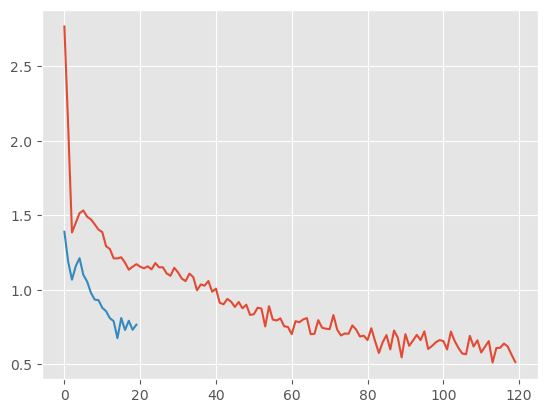

In [18]:
model = create_model(num_classes=NUM_CLASSES)
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# name to save the trained model with
MODEL_NAME = 'model'
[train_loss_list, val_loss_list] = train_model(model, DEVICE, MODEL_NAME, NUM_EPOCHS, MODEL_DIR, PLOT_DIR)
# Plot Validation & Training Loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)

<h1> Inferencing</h1>
Run the cells below to create bounding boxes for new data. Images with bounding boxes overlaid will be present in the outputs folder following inferencing as well. CSV files will also be created, one for the class of each object detected and one for the bounding boxes of said objects. Each row of the CSV file will correspond to each frame of the movie inferenced (in the case of movie inferencing) or each image in the ordering defined by the output images (in the case of image inferencing). Each bounding box is of the form [xmin ymin xmax ymax]
<br> <br>
First define the confidence threshold you would like to use for inferencing

In [19]:
detection_threshold = 0.9 # 0.9 by default

Load your model by running the cell below

In [20]:
model_name = 'model20.pth'
model = load_model(model_name, MODEL_DIR, NUM_CLASSES)

<h2> Movie Inferencing </h2>
Run inferencing on your data by running the cell below. This will output a video to 'outpy.avi' which overlays bounding boxes with their respective classes. The variables 'bboxes' and 'classes' contain inferencing information for each frame. 

In [25]:
# Path to video for inferencing
DIR_TEST = './test_data/testClip.avi'
# Output file name
vidName = 'outpy.avi'
[boxFileName, classFileName] = ['boxes', 'classes']
[bboxes, classes] = inference_video(DIR_TEST, vidName, model)
saveBoxesClasses(boxFileName, classFileName, bboxes, classes, OUT_DIR)

Image 3 done...
--------------------------------------------------
Image 4 done...
--------------------------------------------------
Image 5 done...
--------------------------------------------------
Image 6 done...
--------------------------------------------------
Image 7 done...
--------------------------------------------------
Image 8 done...
--------------------------------------------------
Image 9 done...
--------------------------------------------------
Image 10 done...
--------------------------------------------------
Image 11 done...
--------------------------------------------------
Image 12 done...
--------------------------------------------------
Image 13 done...
--------------------------------------------------
Image 14 done...
--------------------------------------------------
Image 15 done...
--------------------------------------------------
Image 16 done...
--------------------------------------------------
Image 17 done...
--------------------------------------

In [21]:
# Path to folder of images for inferencing
folderName = './test_data/test_images'
[boxFileName, classFileName, scoreFileName] = ['boxes', 'classes', 'scores']
[bboxes, classes, scores] = inference_images(folderName, model, OUT_DIR)
saveBoxesClassesScores(boxFileName, classFileName, scoreFileName, bboxes, classes, scores, OUT_DIR)

Image 1 done...
--------------------------------------------------
Image 2 done...
--------------------------------------------------
Image 3 done...
--------------------------------------------------
Image 4 done...
--------------------------------------------------
Image 5 done...
--------------------------------------------------
Image 6 done...
--------------------------------------------------
Image 7 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
